# Question '4' (final question)

In [343]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools

In [296]:
with open("X.dat","r") as f:
    lines = f.readlines()

Xs, Ys = [], []
for l in lines:
    l = l.split()
    Xs.append(float(l[0]))
    Ys.append(float(l[1]))


with open("X.dat","r") as f2:
    l2 = f2.readlines()
    

data = pd.DataFrame({'X': Xs, 'Y': Ys})

In [516]:
def distance(element_1,element_2):
    x1,y1,x2,y2 = element_1[0],element_1[1],element_2[0],element_2[1]
    d = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    return d

def denom(a,b):
    d = 0.001 if max(a,b) == 0 else max(a,b)
    return d

def percent_change(element_1,element_2):
    x1,y1,x2,y2 = element_1[0],element_1[1],element_2[0],element_2[1]
    change_x = np.abs((x1-x2)/(denom(x1,x2)))
    change_y = np.abs((y1-y2)/(denom(y1,y2)))
    return (change_x+change_y)/2

def best_centroid_index(element, centroids):
    dist_dict = {}
    for i in range(len(centroids)):
        d = distance(centroids[i],element)
        dist_dict[d] = i
    min_d = min(dist_dict.keys())
    min_index = list(dist_dict.keys()).index(min_d)
    return min_index

def assign(X,centroids):
    clusters = dict(zip(range(len(centroids)), [[] for c in centroids]  ))
    for element in X:
        best_i = best_centroid_index(element,centroids)
        clusters[best_i].append(element.tolist())
    new_centroids = []
    for cluster in list(clusters.values()):
        xs,ys = [c[0] for c in cluster], [c[1] for c in cluster]
        x_new,y_new = np.average(xs),np.average(ys)
        new_centroids.append([x_new,y_new])
    change = 0
    for (c1,c2) in list(zip(centroids,new_centroids)):
        change += percent_change(c1,c2)
    return clusters, new_centroids, change

def show_clusters(clusters,centroids,iteration):
    for c in clusters.items():
        c_ = [[item[0] for item in list(c[1])],[item[1] for item in list(c[1])]]
        plt.scatter(x=c_[0],y=c_[1])
        plt.title('Iteration {}'.format(iteration))
    for c in centroids:
        plt.scatter(x=c[0],y=c[1],color='red',s=40)
    plt.show()
    
def k_means(X,k):
    good_count = 0
    centroids = None
    while good_count < 3:
        good_count = 0
        indices = random.choices(population=range(len(X)),k=k)
        if len(set(indices)) == len(indices):
            candidates = X[indices]
            paired_candidates = itertools.combinations(candidates,2)
            for p in paired_candidates:
                if distance(p[0],p[1]) > 0.1:
                    good_count += 1
        
    centroids = X[indices].tolist()
    plt.scatter([c[0] for c in centroids],[c[1] for c in centroids],color='red',s=50)
    change = 1
    iteration = 0
    while change > 0.4:
        clusters = dict(zip(range(len(centroids)),[[c] for c in centroids]))
        clusters, centroids_new, change = assign(X,centroids)
        show_clusters(clusters,centroids,1)
        centroids = centroids_new
    return clusters, centroids

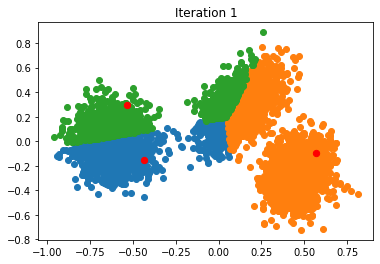

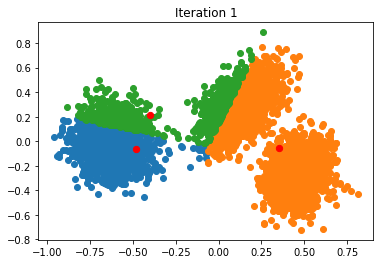

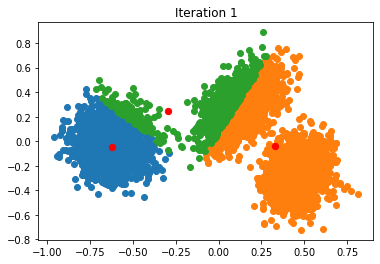

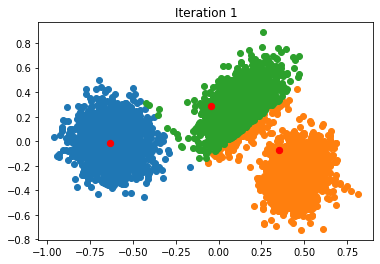

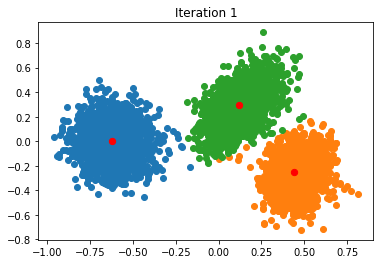

In [517]:
clusters3, centroids3 = k_means(X,3)

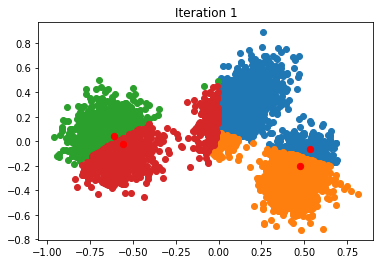

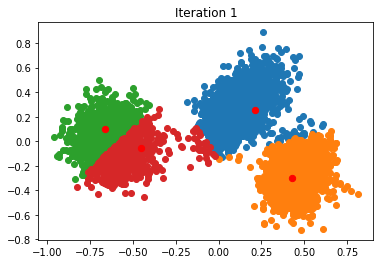

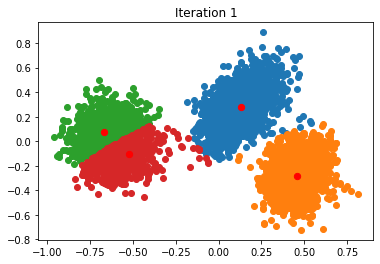

In [518]:
clusters4, centroids4 = k_means(X,4)